In [2]:
import pandas as pd 
import numpy as np 
import operator
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn import neighbors, datasets, preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.datasets import make_blobs, load_digits
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, mean_squared_error, accuracy_score, classification_report, confusion_matrix
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier


Unpacking GetEmployedForum.csv


In [3]:
employ = pd.read_csv("/Users/me./Desktop/Spring '22 /APP Analytics & P Modeling/Project/GetEmployedForum.csv")
# print(len(employ))
employ1 = employ.drop_duplicates() #drop duplicate rows
employ1 = employ1.replace(0, np.nan)
employ1 = employ1.drop(columns = ['datePosted','pronoun','article','auxverb','adverb','conj','verb','adj','cogproc','informal'])

employ1 = employ1.dropna(axis = 0, thresh = 2, subset = ['posemo','negemo','anx','anger','sad','focuspast','focuspresent','focusfuture','work']) #drop rows where less than 2 columns are NaN values
newe = employ1.replace(np.nan, 0) #return NaN as original 0 values 
newe.head()

,CommentContent,score,posemo,negemo,anx,anger,sad,focuspast,focuspresent,focusfuture,work
0,that s actually 20 jobs in a month lol i didn ...,1.0,7.89,0.00,0.0,0.0,0.00,2.63,10.53,0.00,7.89
1,yeahh the shining shimmering splendid that is ...,1.0,10.34,3.45,0.0,0.0,3.45,3.45,13.79,0.00,10.34
2,thank you my friend i really appreciate it,1.0,25.00,0.00,0.0,0.0,0.00,0.00,12.50,0.00,0.00
3,first of all congratulations we all know how h...,1.0,15.62,0.00,0.0,0.0,0.00,3.12,18.75,6.25,3.12
4,absolutely is a factor i had the same issue wh...,1.0,0.00,0.00,0.0,0.0,0.00,5.88,11.76,1.96,5.88


PART 1 

HeatMap


Text(0.5, 1.0, 'Correlation HeatMap')

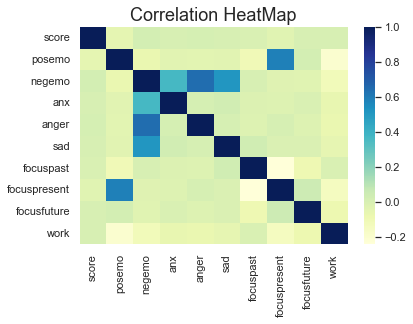

In [4]:
g = sns.heatmap(newe.corr(), cmap = "YlGnBu")
plt.title('Correlation HeatMap', fontsize= 18)

Scatter Plot

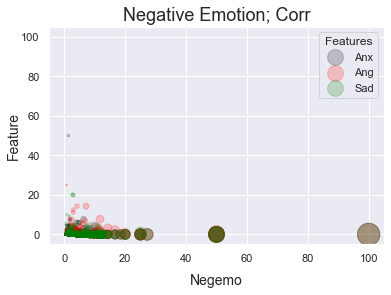

In [5]:
## Scatter Plot Negative Emotion TOP 3 features
colors = np.array(["red","green","blue","yellow",
"pink","black","orange","purple","beige","brown","gray","cyan","magenta"])

anx = newe['anx'].sample(frac=0.05)
ang = newe['anger'].sample(frac=0.05)
sad = newe['sad'].sample(frac=0.05)
neg = newe['negemo'].sample(frac=0.05)

fig, ax = plt.subplots()

## scatter using darkest features from scatter plot
plt.title('Negative Emotion; Corr', fontsize = 18)
plt.ylabel('Feature', fontsize= 14, labelpad= 0)
plt.xlabel('Negemo', fontsize=14, labelpad=10)

##Sample to 10% Population size

scat = ax.scatter(y= anx ,x= neg, s= neg *5,c = 'black', norm = None, vmin = None, vmax = None, alpha = .2)
scat = ax.scatter(y= ang,x= neg, s= neg *5,c = 'red', norm = None, vmin = None, vmax = None, alpha = 0.2)
scat = ax.scatter(y= sad,x= neg, s= neg *5,c = 'green', norm = None, vmin = None, vmax = None, alpha = .2)

plt.legend(title = 'Features', loc = 'upper right', labels = ['Anx','Ang','Sad'])


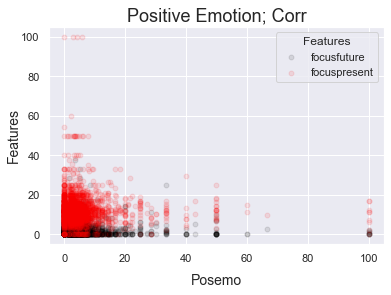

In [6]:
## scatter using darkest features from scatter plot
plt.title('Positive Emotion; Corr', fontsize = 18)
plt.ylabel('Features', fontsize= 14, labelpad= 0)
plt.xlabel('Posemo', fontsize=14, labelpad=10)

##Sample to 10% Population size
fpres = newe['focuspresent'].sample(frac=0.05)
ffut = newe['focusfuture'].sample(frac=0.05)
pose = newe['posemo'].sample(frac=0.05)

#normalize; norm= none vmin = none vmax = none
plt.scatter(y= ffut,x= pose, s= pose.count() *0.01,c = 'black', norm = None, vmin = None, vmax = None, alpha = 0.1)
plt.scatter(y= fpres,x= pose, s= pose.count() *0.01,c = 'red', norm = None, vmin = None, vmax = None, alpha = 0.1)

plt.legend(title = 'Features', loc = 'upper right', labels = ['focusfuture','focuspresent'])
plt.show()

Histogram


In [7]:
bin_size = (newe['score'].sample(frac = 0.1).max() - newe['score'].sample(frac = 0.1).min()) // 5
# print(bin_size)
abs_freq, intervals = np.histogram(newe['score'].sample(frac = .1), bins = 24)
# print(abs_freq)
# print(intervals)
fdist = pd.DataFrame(index = np.linspace(1,24,24), columns = ['start', 'end', 'class_mark','frec_abs'])

fdist['start'] = intervals[:-1]
fdist['end'] = intervals[1:]

fdist['class_mark'] = (fdist['start'] + fdist['end'])/2
fdist['frec_abs'] = abs_freq
fdist

,start,end,class_mark,frec_abs
1.0,-12.000,-8.625,-10.3125,4
2.0,-8.625,-5.250,-6.9375,4
3.0,-5.250,-1.875,-3.5625,21
4.0,-1.875,1.500,-0.1875,2940
5.0,1.500,4.875,3.1875,1378
6.0,4.875,8.250,6.5625,263
7.0,8.250,11.625,9.9375,72
8.0,11.625,15.000,13.3125,31
9.0,15.000,18.375,16.6875,29
10.0,18.375,21.750,20.0625,3


Text(0.5, 1.0, 'Absolute Frequency Histogram')

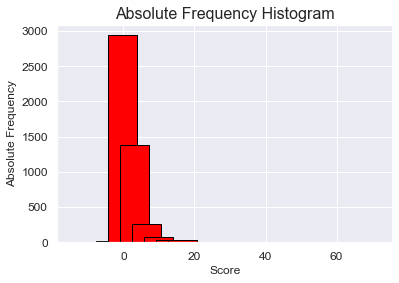

In [8]:
#create bar plot
plt.bar(fdist['class_mark'], fdist['frec_abs'], width = bin_size//2, color = 'red', ec = 'black', alpha = 1)
#add labels
plt.ylabel('Absolute Frequency', fontsize = 12)
plt.xlabel('Score', fontsize = 12)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
#title 
plt.title('Absolute Frequency Histogram', fontsize = 16)

PART 2

Standardize


In [9]:
x = newe.drop(columns = ['CommentContent','score'])
y = newe['score']

x_std = StandardScaler().fit_transform(x)
xnew = pd.DataFrame(x_std, columns = list(x.columns))
xnew.head()
# print(len(xnew))
# print(x.shape)
# print(y.shape)

,posemo,negemo,anx,anger,sad,focuspast,focuspresent,focusfuture,work
0,0.283373,-0.408666,-0.208507,-0.181134,-0.174693,-0.016786,-0.228260,-0.536302,0.168556
1,0.547574,0.581886,-0.208507,-0.181134,1.804169,0.198473,0.160914,-0.536302,0.597959
2,2.128463,-0.408666,-0.208507,-0.181134,-0.174693,-0.707190,0.006916,-0.536302,-1.214299
3,1.116953,-0.408666,-0.208507,-0.181134,-0.174693,0.111845,0.753030,1.857943,-0.667467
4,-0.567460,-0.408666,-0.208507,-0.181134,-0.174693,0.836376,-0.081424,0.214533,-0.183730


PCA && Mean Squared Error

'\nshows need at least 5 components to get around 90% of the variance\n'

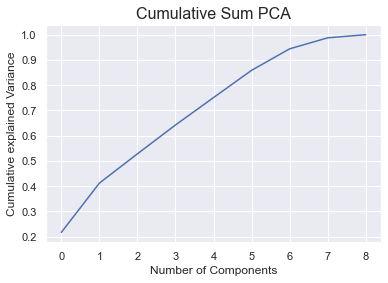

In [10]:
'chart showing number of componentes to total variance'
pca = PCA()
pca.fit_transform(xnew)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative explained Variance')
plt.title ('Cumulative Sum PCA', fontsize = 16)
'''
shows need at least 5 components to get around 90% of the variance
'''




In [11]:
pca = PCA(n_components = 6)
xpca = pca.fit_transform(xnew)

x_train, x_test, y_train, y_test = train_test_split(xpca, y, test_size= .8, random_state = 10)
lm = LinearRegression().fit(x_train, y_train)
y_pred = lm.predict(x_test)

round(mean_squared_error(y_test, y_pred), 2)


8.87

Linear Regression Ranked Importance

In [12]:
#initialize LR and fit model 
# model = LinearRegression().fit(xnew, y)

#name important features
imp = lm.coef_
#name column names from df x 
colnames = xnew.columns
# print(len(colnames))
# print(len(imp))
for i in range(0,6):
    print(colnames[i]+': '+str(imp[i]))

posemo: 0.0545138416797177
negemo: 0.07300666682714453
anx: 0.1065057812689511
anger: -0.010791893254739502
sad: 0.011297014903718615
focuspast: 0.02985382644834194


In [13]:
#Ranked importance 

dic = dict(zip(colnames, imp))
sort_x = sorted(dic.items(), key = operator.itemgetter(1), reverse = True)
print('Feature'+(' '* 6)+'Value')
for i in sort_x:
    print(i[0]+(' '*(len('focuspresent:') - len(i[0])))+': '+str(round(i[1],2)))


Feature      Value
anx          : 0.11
negemo       : 0.07
posemo       : 0.05
focuspast    : 0.03
sad          : 0.01
anger        : -0.01


PART 3 

Clustering (KNN) 

Normalize data 

In [14]:
xdf =MinMaxScaler().fit_transform(x)
nxdf = pd.DataFrame(xdf, columns= list(x.columns))

xval = []
yval = []

for k in range (3,11):
    xval.append(k)
    knn = KNeighborsClassifier(n_neighbors= k)
    yval.append(round(np.mean(cross_val_score(knn,nxdf, y, cv = 5)),2))

print(xval)
print(yval)
# #Uneven values in KNN, can assume that the feature 
# ##values in the data set are not good for predictive analysis




/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
/opt/anaconda3/lib/python3.9/site-packages/s

[3, 4, 5, 6, 7, 8, 9, 10]
[0.49, 0.51, 0.53, 0.54, 0.54, 0.55, 0.56, 0.56]


Accuracy score

In [15]:
xtrain, xtest, ytrain, ytest = train_test_split(nxdf, y, test_size= .8, random_state = 10)
knn = KNeighborsClassifier().fit(x_train, y_train)
ypred = knn.predict(x_test)
accuracy_score(ytest, ypred)

0.5337326607818411

Plot KNN

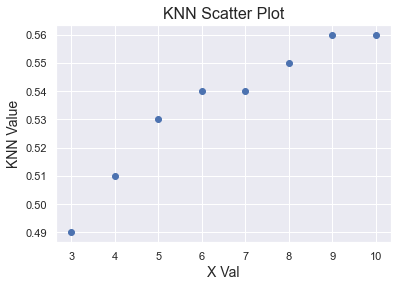

In [16]:
plt.scatter(xval,yval)
plt.title('KNN Scatter Plot', fontsize = 16)
plt.xlabel('X Val', fontsize = 14)
plt.ylabel('KNN Value', fontsize = 14)
plt.show()